In [6]:
import torch
import matplotlib.pyplot as plt

In [7]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([42.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)

The parameters are w=tensor([4.7502], requires_grad=True), b=tensor([0.5630], requires_grad=True), and loss=28476.896484375
The parameters are w=tensor([7.6200], requires_grad=True), b=tensor([0.7638], requires_grad=True), and loss=12266.072265625
The parameters are w=tensor([9.4817], requires_grad=True), b=tensor([0.8954], requires_grad=True), and loss=5443.29541015625
The parameters are w=tensor([10.6894], requires_grad=True), b=tensor([0.9821], requires_grad=True), and loss=2571.73388671875
The parameters are w=tensor([11.4728], requires_grad=True), b=tensor([1.0396], requires_grad=True), and loss=1363.151611328125
The parameters are w=tensor([11.9810], requires_grad=True), b=tensor([1.0781], requires_grad=True), and loss=854.4778442382812
The parameters are w=tensor([12.3106], requires_grad=True), b=tensor([1.1044], requires_grad=True), and loss=640.3810424804688
The parameters are w=tensor([12.5243], requires_grad=True), b=tensor([1.1228], requires_grad=True), and loss=550.2648925

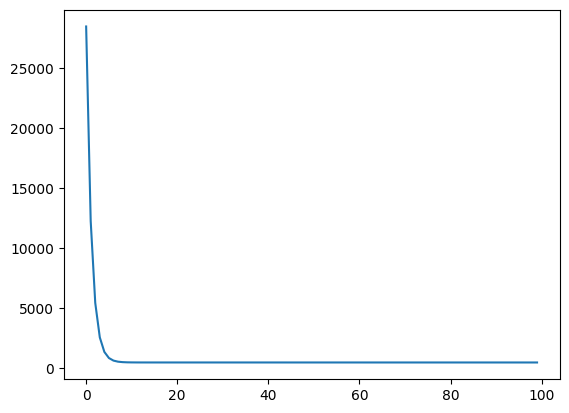

In [8]:
class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad = True)
        self.b = torch.rand([1], requires_grad = True)

    def forward(self, x):
        return self.w * x + self.b

    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj, y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for  j in range(len(x)):
        y_p = model.forward(x[j])
        loss +=criterion(y[j], y_p)

    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()

    with torch.no_grad():
        model.update()
    
    model.reset_grad()
    
    print("The parameters are w={}, b={}, and loss={}".format(model.w, model.b, loss.item()))

plt.plot(loss_list)
plt.show()